In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
import pandas as pd
#loding data from mouse.csv
df = pd.read_csv('mouse(N70).csv')

In [22]:
#delete inefficient column from feature columns
df=df.drop(columns='DPI changes(have1 or not0)')
#delete unusefull feature
df=df.drop(columns='programmability(have1)')
#replace the Nun number with median of its columns
df['Click lifetime'].fillna(df['Click lifetime'].median(),inplace=True)
df['Two-handed access'].fillna(df['Two-handed access'].median(),inplace=True)
#df['programmability(have1)'].fillna(df['programmability(have1)'].median(),inplace=True)
df['Acceleration'].fillna(df['Acceleration'].median(),inplace=True)
df['number of keys'].fillna(df['number of keys'].median(),inplace=True)

## Spliting Data

In [23]:
a,b=df.shape
#chosing the target and feature
#spliting with 50 data
Yl=df.iloc[:50,b-1:b]
Xl=df.iloc[:50,:b-1]
#spliting with 70 data
Yh=df.iloc[:,b-1:b]
Xh=df.iloc[:,:b-1]

## Noise detection and droping

In [24]:
#detecting of noise data and deleting them
from sklearn.ensemble import IsolationForest
detector = IsolationForest(contamination=0.1,random_state=42)
detector.fit(Xl)
y_pred_noise = detector.predict(Xl)
h=y_pred_noise
#define list of noise data for ploting
noise=[]
noisey=[]
#set copy of X and Y to pass the Iterate error
Xnew=Xl
Ynew=Yl
print(Xl.shape)
print(y_pred_noise)
#find(from X Y) and add noise data in noiselist beasd on y_pred_noise
for x in range(len(y_pred_noise)):
    if y_pred_noise[x]==-1:      
        noise.append(Xnew.iloc[x])
        noisey.append(Ynew.iloc[x])
        Xl=Xl.drop(x)
        Yl=Yl.drop(x)

(50, 6)
[ 1  1 -1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1]


In [25]:
#detecting of noise data and deleting them
from sklearn.ensemble import IsolationForest
detector = IsolationForest(contamination=0.1,random_state=42)
detector.fit(Xh)
y_pred_noise = detector.predict(Xh)
h=y_pred_noise
#define list of noise data for ploting
noise=[]
noisey=[]
#set copy of X and Y to pass the Iterate error
Xnew=Xh
Ynew=Yh
print(Xh.shape)
print(y_pred_noise)
#find(from X Y) and add noise data in noiselist beasd on y_pred_noise
for x in range(len(y_pred_noise)):
    if y_pred_noise[x]==-1:      
        noise.append(Xnew.iloc[x])
        noisey.append(Ynew.iloc[x])
        Xh=Xh.drop(x)
        Yh=Yh.drop(x)

(66, 6)
[ 1  1 -1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1  1]


In [26]:
Xl.describe()

,DPI,Click lifetime,Acceleration,Two-handed access,number of keys,conection(remote0)
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,9655.555556,35.288889,35.666667,1.288889,7.066667,0.977778
std,6440.798777,23.710970,13.295591,0.458368,1.643168,0.499495
min,1000.000000,1.000000,10.000000,1.000000,4.000000,0.000000
25%,3200.000000,10.000000,23.000000,1.000000,6.000000,1.000000
50%,8000.000000,50.000000,40.000000,1.000000,7.000000,1.000000
75%,16000.000000,50.000000,50.000000,2.000000,8.000000,1.000000
max,20000.000000,70.000000,50.000000,2.000000,11.000000,2.000000


In [27]:
x, X_test, y, y_test = train_test_split(Xl, Yl/1000000, test_size=.2,shuffle=True,random_state=42)

In [28]:
x70, X_test70, y70, y_test70 = train_test_split(Xh, Yh/1000000, test_size=.2,shuffle=True,random_state=42)

## Standard scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x=scaler.transform(x)
X_test=scaler.transform(X_test)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x70)
x70=scaler.transform(x70)
X_test70=scaler.transform(X_test70)

## KNN algorithem

In [31]:
from sklearn.metrics import r2_score
kn = KNeighborsRegressor(n_neighbors=4)
kn.fit(x,y)
pred = kn.predict(X_test)
predy = kn.predict(x)

kn70 = KNeighborsRegressor(n_neighbors=4)
kn70.fit(x70,y70)
pred70 = kn70.predict(X_test70)
predy70 = kn70.predict(x70)


KNN_R2_70 = r2_score(y_test70,pred70)
KNN_R2_70_train = r2_score(y70,predy70)

KNN_R2_50 = r2_score(y_test,pred)
KNN_R2_50_train = r2_score(y,predy)

In [32]:
KNN_R2_50

0.49916898440042323

In [33]:
KNN_R2_70

0.7114859554935256

## Decesion Tree

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
max_depth=[2,3,4,5,6,7,8,9,10,11,12,13]
Dtree=DecisionTreeRegressor(max_depth=6)
Dtree.fit(x,y)
pred=Dtree.predict(X_test)

Dtree70=DecisionTreeRegressor(max_depth=3)
Dtree70.fit(x70,y70)
pred70=Dtree70.predict(X_test70)


Decesion_Tree_R2_70=r2_score(y_test70,pred70)
Decesion_Tree_R2_50=r2_score(y_test,pred)
print(Decesion_Tree_R2_70,Decesion_Tree_R2_50)

0.776307181217744 0.5208352930259519


## Radnom Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
regg=RandomForestRegressor(n_estimators=100,min_samples_leaf=1,max_depth=5)
regg70=RandomForestRegressor(n_estimators=150,min_samples_leaf=1,max_depth=5)
y=np.ravel(y)
regg.fit(x,y)
predtest50=regg.predict(X_test)
predtrain50=regg.predict(x)

y70=np.ravel(y70)
regg70.fit(x70,y70)
predtest70=regg70.predict(X_test70)
predtrain70=regg70.predict(x70)


Random_Forest_R2_70 = r2_score(y_test70,predtest70)
Random_Forest_R2_50 = r2_score(y_test,predtest50)

In [36]:
print(Random_Forest_R2_70,Random_Forest_R2_50)

0.7469942304570165 0.6464787495402156


## Adaboost

In [37]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
base=DecisionTreeRegressor(max_depth=30, min_samples_leaf=1)
y = np.ravel(y)
y_test = np.ravel(y_test)
adaboost = AdaBoostRegressor(base,n_estimators=100,learning_rate=0.01)
adaboost.fit(x,y)
pred_test_50 = adaboost.predict(X_test)
pred_train_50 = adaboost.predict(x)

y70 = np.ravel(y70)
y_test70 = np.ravel(y_test70)
adaboost = AdaBoostRegressor(base,n_estimators=100,learning_rate=0.01)
adaboost.fit(x70,y70)
pred_test_70 = adaboost.predict(X_test70)
pred_train_70 = adaboost.predict(x70)


ADAboost_R2_50_test = r2_score(y_test,pred_test_50)
ADAboost_R2_50_train = r2_score(y,pred_train_50)
ADAboost_R2_70_test = r2_score(y_test70,pred_test_70)
ADAboost_R2_70_train = r2_score(y70,pred_train_70)


## SVR

In [38]:
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


svr = SVR(gamma = 0.01,C = 100000)
svr.fit(x,y)
pred_test_50 = svr.predict(X_test)
SVR_R2_50 = r2_score(y_test,pred_test_50)

svr1 = SVR(gamma = 0.01,C = 10)
svr1.fit(x70,y70)
pred_test_70 = svr.predict(X_test70)

SVR_R2_50 = r2_score(y_test,pred_test_50)
SVR_R2_70 = r2_score(y_test70,pred_test_70)


In [39]:
list_r2_70=[KNN_R2_70 , Decesion_Tree_R2_70 , Random_Forest_R2_70 , ADAboost_R2_70_test , SVR_R2_70]
list_r2_50=[KNN_R2_50 , Decesion_Tree_R2_50 , Random_Forest_R2_50 , ADAboost_R2_50_test , SVR_R2_50]

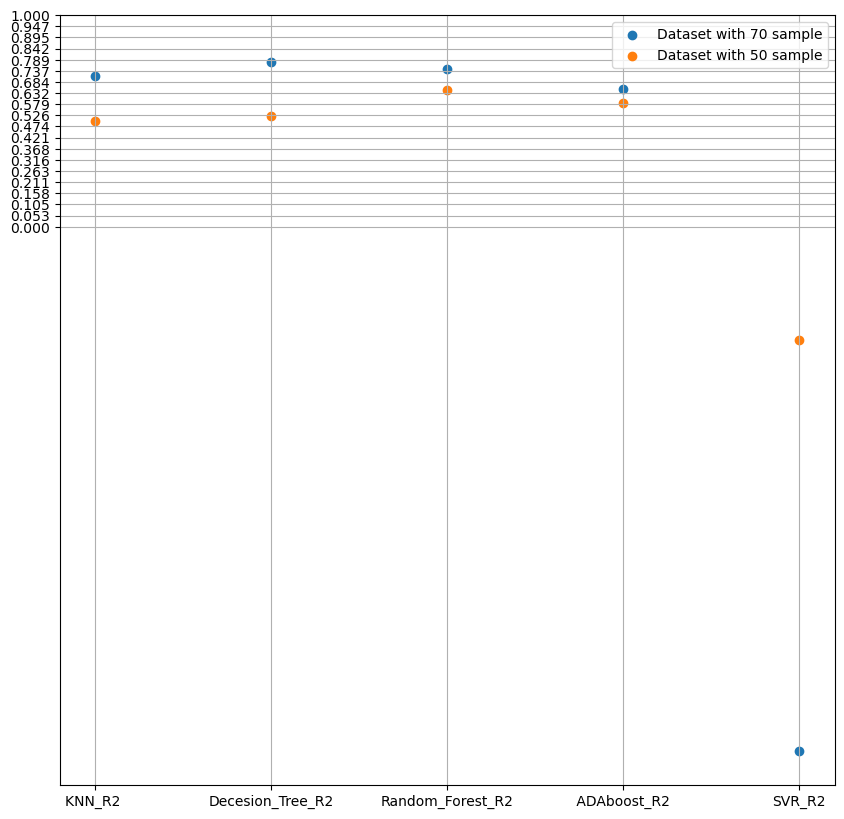

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(list_r2_70)),list_r2_70)
plt.scatter(range(len(list_r2_70)),list_r2_50)
plt.xticks(range(len(list_r2_70)),labels=['KNN_R2 ', 'Decesion_Tree_R2' , 'Random_Forest_R2' ,' ADAboost_R2 ', 'SVR_R2'])
plt.yticks(np.linspace(0,1,20))
plt.legend(['Dataset with 70 sample','Dataset with 50 sample'])
plt.grid()
plt.show()
